


# **CPE019 - Miderm Quiz 1**

---


**Name:** QUEJADO,  Jimlord M. <br>
**Course and Section:** CPE019-CPE32S3 <br>
**Date of Submission**: April 2, 2024<br>
**Instructor:** Engr. Roman Richard<br>

---




## Loading the data set:

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967)

# data (as pandas dataframes)
X = phiusiil_phishing_url_website.data.features
y = phiusiil_phishing_url_website.data.targets

# metadata
print(phiusiil_phishing_url_website.metadata)

# variable information
print(phiusiil_phishing_url_website.variables)


{'uci_id': 967, 'name': 'PhiUSIIL Phishing URL (Website)', 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv', 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 235795, 'num_features': 54, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['label'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2024, 'last_updated': 'Mon Mar 18 

In [ ]:
# importing the libararies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



## Task 1: Exploratory Data Analysis (Cleaning + Prepping the dataset)

In [ ]:
#creating the new varible DF so that i dont have to re load the data set above(takes too much time)
DF = X

In [ ]:
#cheking the contents
DF.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,1,0,0,1,34,20,28,119,0,124
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,0,1,50,9,8,39,0,217
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,0,1,10,2,7,42,2,5
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,0,1,1,1,3,27,15,22,1,31
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,1,0,1,244,15,34,72,1,85


<font color ='red'> Remarks:
The data is loaded along with its headers

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD                         235795 non-null  object 
 6   URLSimilarityIndex          235795 non-null  float64
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-null  int64  
 13  NoOfObfuscated

<font color = 'red'>Remarks:

The total number of instances in the data set as per the website is 235795.
As shown in the data set, **there are no missing values**. There are object types variable. Upon checking, I decided to drop this as converting it to numerical value is impossible and could create more outliers in the data set and affect the performance of the model.

In [ ]:
#removing of object types

DF = DF.select_dtypes(exclude=['object'])
DF_test=DF

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   URLSimilarityIndex          235795 non-null  float64
 4   CharContinuationRate        235795 non-null  float64
 5   TLDLegitimateProb           235795 non-null  float64
 6   URLCharProb                 235795 non-null  float64
 7   TLDLength                   235795 non-null  int64  
 8   NoOfSubDomain               235795 non-null  int64  
 9   HasObfuscation              235795 non-null  int64  
 10  NoOfObfuscatedChar          235795 non-null  int64  
 11  ObfuscationRatio            235795 non-null  float64
 12  NoOfLettersInURL            235795 non-null  int64  
 13  LetterRatioInU

In [ ]:
DF.corr()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
URLLength,1.000000,0.243091,0.277272,-0.421104,-0.241104,-0.016656,-0.245215,0.033339,0.071058,0.161980,...,-0.031734,-0.057816,-0.025163,-0.126420,-0.064639,-0.014507,-0.078643,-0.074722,-0.023206,-0.059055
DomainLength,0.243091,1.000000,-0.041398,-0.420694,-0.577425,0.027209,-0.178104,0.152669,0.399157,0.041643,...,-0.039944,-0.065895,-0.034773,-0.196860,-0.083458,-0.017596,-0.102216,-0.096712,-0.031673,-0.070099
IsDomainIP,0.277272,-0.041398,1.000000,-0.121439,-0.101307,-0.053220,-0.111769,-0.011125,0.084619,0.001239,...,-0.015708,-0.013863,-0.005919,-0.022796,-0.016502,-0.004149,-0.023126,-0.018981,-0.006793,-0.015269
URLSimilarityIndex,-0.421104,-0.420694,-0.121439,1.000000,0.572938,0.162042,0.571622,-0.053915,-0.058481,-0.100159,...,0.151290,0.291542,0.087228,0.613620,0.235728,0.057683,0.315679,0.271590,0.091556,0.221960
CharContinuationRate,-0.241104,-0.577425,-0.101307,0.572938,1.000000,0.237221,0.349810,0.051438,-0.482314,-0.036231,...,0.095809,0.179145,0.059667,0.345566,0.135931,0.027943,0.183900,0.147881,0.049963,0.121745
TLDLegitimateProb,-0.016656,0.027209,-0.053220,0.162042,0.237221,1.000000,0.274224,0.386794,-0.250048,-0.016577,...,0.085441,0.111494,0.038673,0.114394,0.053432,0.008296,0.058475,0.028216,0.015252,0.033182
URLCharProb,-0.245215,-0.178104,-0.111769,0.571622,0.349810,0.274224,1.000000,0.069818,-0.081576,-0.056108,...,0.072523,0.162323,0.062187,0.349530,0.128617,0.034470,0.176119,0.144543,0.050855,0.120841
TLDLength,0.033339,0.152669,-0.011125,-0.053915,0.051438,0.386794,0.069818,1.000000,-0.162431,0.000974,...,0.008313,0.023103,0.017689,-0.043484,-0.029074,-0.004249,-0.024109,-0.046451,-0.014442,-0.026486
NoOfSubDomain,0.071058,0.399157,0.084619,-0.058481,-0.482314,-0.250048,-0.081576,-0.162431,1.000000,0.015902,...,-0.035304,-0.024983,-0.016590,-0.006321,-0.009474,-0.001003,-0.010226,0.003108,0.001702,-0.001538
HasObfuscation,0.161980,0.041643,0.001239,-0.100159,-0.036231,-0.016577,-0.056108,0.000974,0.015902,1.000000,...,-0.006924,-0.009674,-0.002711,-0.014249,-0.012997,-0.002841,-0.015700,-0.016541,-0.004463,-0.013342


<font color = 'red'> Remarks:

Most of the data are weakly correlated. Related features such as noOfEmptyRef and NoOfExternalRef have significantly higher correlation.

In [ ]:
DF.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.127089,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.333074,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000


<font color = 'red'> Remarks:

Some features of the dataset are have high dispersion. Other features doesn't.


## Splitting the data set:



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#temp val
features = y  #creting temp val for the loaded y in the data set

X = DF #input
y = features  #target

#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)


## Normalizing the data set

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

## Task 2: Data modelling using ANN


The goal of the modelling would be classification. In the data set, the clasification can be either legitimate URL or phising URL.

The label are as follows: <br>
- Label 0 corresponds to a legitimate URL
- Label 1 to a phishing URL



In [ ]:
from keras.models  import Sequential
from keras.layers import  Dense, Dropout, BatchNormalization
from keras.optimizers import SGD,Adam

In [ ]:
model1  = Sequential([
    Dense(56,input_shape=(X_train_norm.shape[1],), activation="relu"),
    Dropout(0.7),
    Dense(48, activation="relu"),
    BatchNormalization(True),
    Dense(40, activation="relu"),
    Dropout(0.8),
    BatchNormalization(True),
    Dense(32, activation="relu"),
    Dropout(0.7),
    Dense(32, activation="relu"),

    Dense(1, activation="sigmoid")
])

In [ ]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 56)                2856      
                                                                 
 dropout_12 (Dropout)        (None, 56)                0         
                                                                 
 dense_29 (Dense)            (None, 48)                2736      
                                                                 
 batch_normalization_2 (Bat  (None, 48)                192       
 chNormalization)                                                
                                                                 
 dense_30 (Dense)            (None, 40)                1960      
                                                                 
 dropout_13 (Dropout)        (None, 40)                0         
                                                      

In [ ]:
model1.compile(
    Adam(learning_rate = .001),
    "binary_crossentropy",
    metrics=["accuracy"])

run_hist_1 = model1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=30,batch_size = 500)

Epoch 1/30
354/354 [==============================] - 8s 7ms/step - loss: 0.2994 - accuracy: 0.8417 - val_loss: 0.0042 - val_accuracy: 0.9989
Epoch 2/30
354/354 [==============================] - 3s 9ms/step - loss: 0.0385 - accuracy: 0.9884 - val_loss: 0.0019 - val_accuracy: 0.9996
Epoch 3/30
354/354 [==============================] - 2s 7ms/step - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.0017 - val_accuracy: 0.9997
Epoch 4/30
354/354 [==============================] - 2s 7ms/step - loss: 0.0193 - accuracy: 0.9939 - val_loss: 0.0012 - val_accuracy: 0.9998
Epoch 5/30
354/354 [==============================] - 2s 7ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0011 - val_accuracy: 0.9998
Epoch 6/30
354/354 [==============================] - 2s 7ms/step - loss: 0.0151 - accuracy: 0.9946 - val_loss: 0.0013 - val_accuracy: 0.9998
Epoch 7/30
354/354 [==============================] - 4s 10ms/step - loss: 0.0144 - accuracy: 0.9948 - val_loss: 6.8710e-04 - val_accuracy: 0.9999
E

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



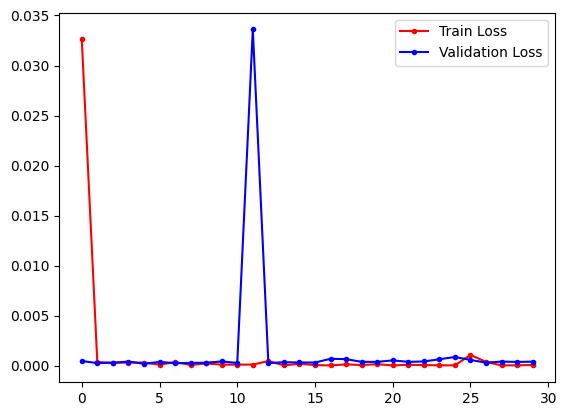

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

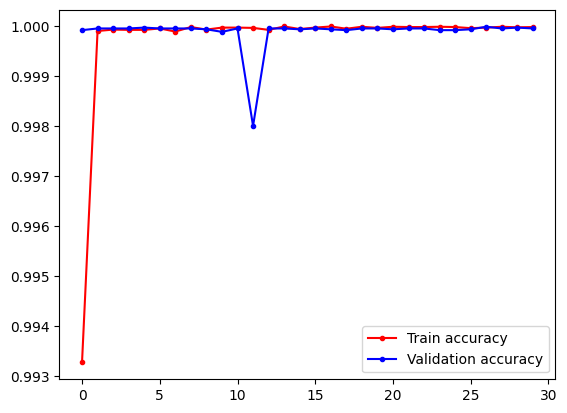

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["accuracy"],'r', marker='.', label="Train accuracy")
ax.plot(run_hist_1.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
ax.legend()

In [ ]:
y_pred_prob_nn_1 = model1.predict(X_test_norm)

y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

1843/1843 [==============================] - 3s 1ms/step


accuracy is 1.000
roc-auc is 1.000


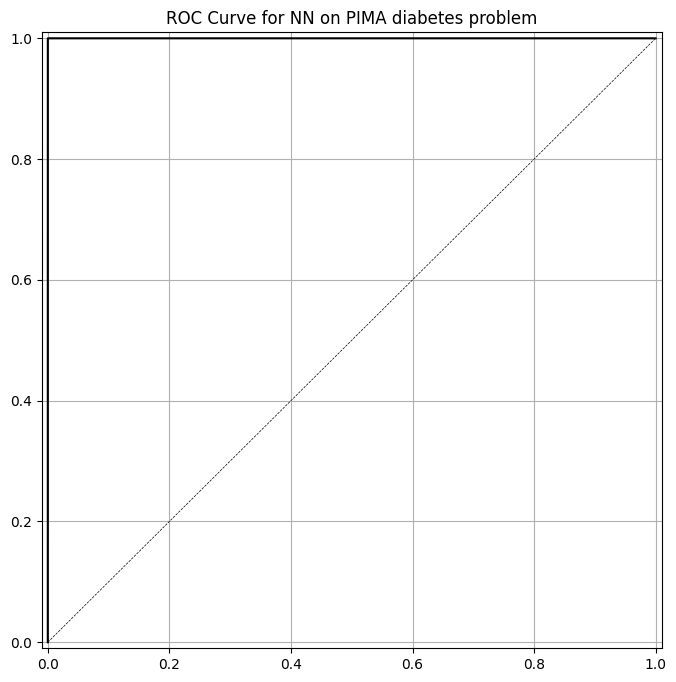

In [ ]:
from sklearn.metrics import  roc_auc_score, roc_curve, accuracy_score
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

Remarks:

The model cannot generalize and is very bad as it has 100% accuracy and ROC curve.
<br><br>Possible causes are as follows:
1. data cleaning is insufficient
2. Complexity of model is too shallow
